In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

The dataset is built from the initial dataset consisted of 600000 transactional data collected in 6 years (period 2014-2019), indicating date and time of sale, pharmaceutical drug brand name and sold quantity, exported from Point-of-Sale system in the individual pharmacy. Selected group of drugs from the dataset (57 drugs) is classified to the following Anatomical Therapeutic Chemical (ATC) Classification System categories: <br>

M01AB - Anti-inflammatory and antirheumatic products, non-steroids, Acetic acid derivatives and related substances<br>
M01AE - Anti-inflammatory and antirheumatic products, non-steroids, Propionic acid derivatives<br>
N02BA - Other analgesics and antipyretics, Salicylic acid and derivatives<br>
N02BE/B - Other analgesics and antipyretics, Pyrazolones and Anilides<br>
N05B - Psycholeptics drugs, Anxiolytic drugs<br>
N05C - Psycholeptics drugs, Hypnotics and sedatives drugs<br>
R03 - Drugs for obstructive airway diseases<br>
R06 - Antihistamines for systemic use<br>
Sales data are resampled to the hourly, daily, weekly and monthly periods. Data is already pre-processed, where processing included outlier detection and treatment and missing data imputation.<br>
Source:<br>
https://www.kaggle.com/datasets/milanzdravkovic/pharma-sales-data 

In [2]:
# Load monthly sales data 
monthly_df = pd.read_csv('Resources/salesmonthly.csv')
monthly_df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


In [3]:
# Check data types
monthly_df.dtypes

datum     object
M01AB    float64
M01AE    float64
N02BA    float64
N02BE    float64
N05B     float64
N05C     float64
R03      float64
R06      float64
dtype: object

In [4]:
monthly_df["Date"] = pd.to_datetime(monthly_df["datum"])

In [5]:
len(monthly_df)

70

C:\Users\Theresa\AppData\Local\Temp\ipykernel_14100\137853203.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = monthly_df.corr()
C:\Users\Theresa\AppData\Local\Temp\ipykernel_14100\137853203.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(monthly_df.corr(), annot=True, cmap='coolwarm', robust=True, cbar=True)


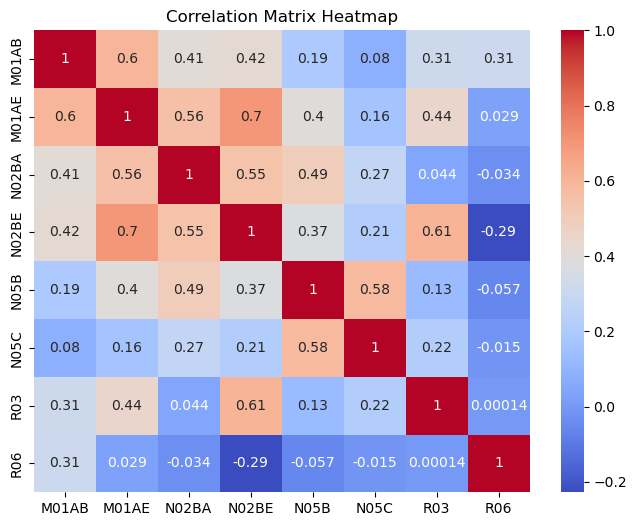

In [6]:
correlation_matrix = monthly_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(monthly_df.corr(), annot=True, cmap='coolwarm', robust=True, cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

The correlation coefficient quantifies the strength of a linear relationship between two variables. The correlation coefficient can range from -1 to 1. <br>
Positive correlation: as the value of one variable increases, the value of the other variable also tends to increase.<br>
Negative correlation: as the value of one variable increases, the value of the other variable tends to decrease. <br>
Strong correlations: <br>
M01AE AND N02BE<br>
N02BA AND N02BE<br>
R03 AND N02BE<br>

In [7]:
# Load daily sales data 
daily_df = pd.read_csv('Resources/salesdaily.csv')
daily_df.dtypes

datum            object
M01AB           float64
M01AE           float64
N02BA           float64
N02BE           float64
N05B            float64
N05C            float64
R03             float64
R06             float64
Year              int64
Month             int64
Hour              int64
Weekday Name     object
dtype: object

In [8]:
daily_df["datum"]=pd.to_datetime(daily_df["datum"])

daily_df["Date"]=pd.to_datetime(daily_df[["Year", "Month"]].assign(day=1))

In [9]:
# create a "Day" column based on the datum
daily_df["Day"]=daily_df["datum"].dt.day
daily_df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name,Date,Day
0,2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday,2014-01-01,2
1,2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday,2014-01-01,3
2,2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday,2014-01-01,4
3,2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday,2014-01-01,5
4,2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday,2014-01-01,6


In [10]:
daily_df.drop(columns=['Date'], inplace=True)
daily_df.head

<bound method NDFrame.head of           datum  M01AB   M01AE  N02BA  N02BE  N05B  N05C   R03   R06  Year  \
0    2014-01-02   0.00   3.670   3.40  32.40   7.0   0.0   0.0  2.00  2014   
1    2014-01-03   8.00   4.000   4.40  50.60  16.0   0.0  20.0  4.00  2014   
2    2014-01-04   2.00   1.000   6.50  61.85  10.0   0.0   9.0  1.00  2014   
3    2014-01-05   4.00   3.000   7.00  41.10   8.0   0.0   3.0  0.00  2014   
4    2014-01-06   5.00   1.000   4.50  21.70  16.0   2.0   6.0  2.00  2014   
...         ...    ...     ...    ...    ...   ...   ...   ...   ...   ...   
2101 2019-10-04   7.34   5.683   2.25  22.45  13.0   0.0   1.0  1.00  2019   
2102 2019-10-05   3.84   5.010   6.00  25.40   7.0   0.0   0.0  0.33  2019   
2103 2019-10-06   4.00  11.690   2.00  34.60   6.0   0.0   5.0  4.20  2019   
2104 2019-10-07   7.34   4.507   3.00  50.80   6.0   0.0  10.0  1.00  2019   
2105 2019-10-08   0.33   1.730   0.50  44.30  20.0   2.0   2.0  0.00  2019   

      Month  Hour Weekday Name  D

In [11]:
# convert dataframe from wide to long
updated_df = pd.melt(daily_df, id_vars=["datum","Year", "Month", "Weekday Name", "Day"],
                     value_vars=["M01AB", "M01AE", "N02BA", "N02BE", "N05B", "N05C", "R03", "R06"],
                     var_name="Drug Type",
                     value_name="Quantity")
updated_df.head()

,datum,Year,Month,Weekday Name,Day,Drug Type,Quantity
0,2014-01-02,2014,1,Thursday,2,M01AB,0.0
1,2014-01-03,2014,1,Friday,3,M01AB,8.0
2,2014-01-04,2014,1,Saturday,4,M01AB,2.0
3,2014-01-05,2014,1,Sunday,5,M01AB,4.0
4,2014-01-06,2014,1,Monday,6,M01AB,5.0


In [12]:
# Encode weekday name and drug type
label_encoder=LabelEncoder()
updated_df["Weekday Name"]=label_encoder.fit_transform(updated_df["Weekday Name"])


In [13]:
updated_df["Drug Type"]=label_encoder.fit_transform(updated_df["Drug Type"])

In [14]:
updated_df.set_index("datum", inplace=True)
updated_df

,Year,Month,Weekday Name,Day,Drug Type,Quantity
datum,,,,,,
2014-01-02,2014,1,4,2,0,0.00
2014-01-03,2014,1,0,3,0,8.00
2014-01-04,2014,1,2,4,0,2.00
2014-01-05,2014,1,3,5,0,4.00
2014-01-06,2014,1,1,6,0,5.00
...,...,...,...,...,...,...
2019-10-04,2019,10,0,4,7,1.00
2019-10-05,2019,10,2,5,7,0.33
2019-10-06,2019,10,3,6,7,4.20


In [15]:
#splitting by year to create more instances
train = updated_df[updated_df["Year"]<2019]
test = updated_df[updated_df["Year"]>=2019]

In [16]:
# Separate the y variable, the labels
y_train = updated_df["Quantity"]
X_train = updated_df.drop(columns="Quantity", axis=1)

# Separate the X variable, the features
y_test = updated_df["Quantity"]
X_test = updated_df.drop(columns="Quantity", axis=1)

In [17]:
y_train [:5]

datum
2014-01-02    0.0
2014-01-03    8.0
2014-01-04    2.0
2014-01-05    4.0
2014-01-06    5.0
Name: Quantity, dtype: float64

In [18]:
X_train[:5] 

,Year,Month,Weekday Name,Day,Drug Type
datum,,,,,
2014-01-02,2014,1,4,2,0
2014-01-03,2014,1,0,3,0
2014-01-04,2014,1,2,4,0
2014-01-05,2014,1,3,5,0
2014-01-06,2014,1,1,6,0


In [19]:
X_test.shape, y_test.shape

((16848, 5), (16848,))

## Random Forest Regressor Model 

In [20]:
# Create a Random Forest Regressor model
rf_regressor = RandomForestRegressor(max_depth= 3, n_estimators= 500, random_state=42)

# Train the Random Forest Regressor model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_regressor.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred_rf)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Squared Error: {mse}")

Root Mean Squared Error: 6.523205418930547
Mean Squared Error: 42.55220893756485


RMSE is the square root of the average of squared differences between predicted and actual values. 
The model's predictions are off by approximately 6.5 units in the same scale as the target variable. Lower RMSE values are desirable.

Mean Squared Error (MSE) is a measure of the average squared difference between predicted values and actual values. Since the data is relatively large (16848 rows × 6 columns) a MSE if 42 may be acceptable but future refinements may be needed. 

## Find and remove outliers

In [21]:
# Calculate the IQR
Q1 = updated_df['Quantity'].quantile(0.25)
Q3 = updated_df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
outliers = (updated_df['Quantity'] < lower_bound) | (updated_df['Quantity'] > upper_bound)
cleaned_df = updated_df[~outliers]
cleaned_df

,Year,Month,Weekday Name,Day,Drug Type,Quantity
datum,,,,,,
2014-01-02,2014,1,4,2,0,0.00
2014-01-03,2014,1,0,3,0,8.00
2014-01-04,2014,1,2,4,0,2.00
2014-01-05,2014,1,3,5,0,4.00
2014-01-06,2014,1,1,6,0,5.00
...,...,...,...,...,...,...
2019-10-04,2019,10,0,4,7,1.00
2019-10-05,2019,10,2,5,7,0.33
2019-10-06,2019,10,3,6,7,4.20


## Retrain and retest data

In [30]:
#splitting by year to create more instances
train = cleaned_df[cleaned_df["Year"]<2019]
test = cleaned_df[cleaned_df["Year"]>=2019]

# Separate the y variable, the labels
y_train = train["Quantity"]
X_train = train.drop(columns="Quantity", axis=1)

# Separate the X variable, the features
y_test = test["Quantity"]
X_test = test.drop(columns="Quantity", axis=1)

In [31]:
# Create a Random Forest Regressor model
rf_regressor_new = RandomForestRegressor(max_depth= 3, n_estimators= 500, random_state=42)

# Train the Random Forest Regressor model
rf_regressor_new .fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf_new = rf_regressor_new.predict(X_test)

# Calculate Mean Squared Error
mse_new = mean_squared_error(y_test, y_val_pred)

# Calculate Root Mean Squared Error
rmse_new = np.sqrt(mse_new)

print(f"Root Mean Squared Error: {rmse_new}")

print(f"Mean Squared Error: {mse_new}")

Root Mean Squared Error: 2.988538088549627
Mean Squared Error: 8.931359906711856


The results definitely imroved by removing the outliers. Further analysis with other models and ensemble learning would improve results.

In [32]:
import pickle

model_file_path = 'predict_pharma_sales.pkl'
with open(model_file_path, 'wb') as file:
    pickle.dump(rf_regressor_new, file)

print(f'Model saved as {model_file_path}')

Model saved as predict_pharma_sales.pkl
